In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load sample dataset (replace with actual dataset)
data = {
    'CustomerID': range(1, 11),
    'MonthlyCharges': [20, 100, 50, 80, 60, 40, 90, 30, 70, 110],
    'TotalCharges': [100, 5000, 1200, 3000, 1800, 700, 4500, 600, 2500, 5200],
    'Tenure': [1, 50, 10, 35, 20, 5, 45, 8, 30, 55],
    'Churn': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]  # 1 = Churned, 0 = Retained
}
df = pd.DataFrame(data)

Accuracy: 1.00
Confusion Matrix:
 [[2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\Users\Nikunj.Sharma\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


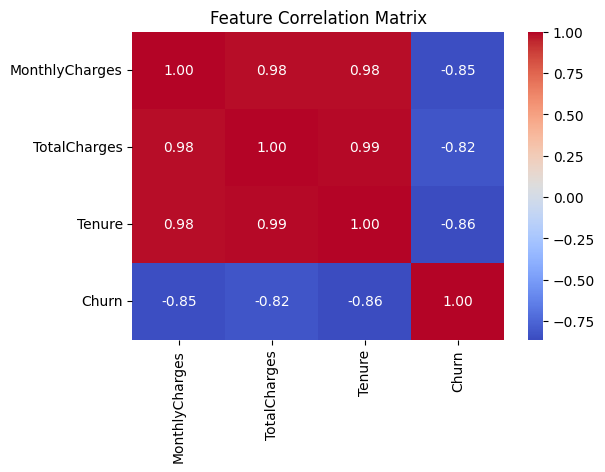

In [4]:




df = pd.DataFrame(data)

# Drop CustomerID (not useful for model training)
df = df.drop(columns=['CustomerID'])

# Split dataset into features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Visualizing Feature Correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()
